<a href="https://colab.research.google.com/github/bgteffera/Data-Analysis-Portfolio/blob/main/Russian_Offensive's_Impact_on_Commodities_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PURPOSE**

The purpose of this study is to visualize the impact the Russian invasion of Ukraine has had on commodities prices. Data was collected from Kaggle, then cleaned and visualized in python. Correlation matrices, bar graphs, and line graphs were constructed. Finally, a profile report was performed on the close prices. We will only use data starting from 1/1/2020. This opens up the possibility of also seeing any influence the global covid pandemic had on the commodities market, however, we will focus on the Russian offensive that took place on 2/24/2022.

https://www.kaggle.com/datasets/prasertk/historical-commodity-prices-from-20002022?resource=download

Further reading:
https://thedocs.worldbank.org/en/doc/5d903e848db1d1b83e0ec8f744e55570-0350012021/related/Implications-of-the-War-in-Ukraine-for-the-Global-Economy.pdf

#**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas_profiling

<ipython-input-1-e1daf66b40d3>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.1 MB)
  Preparing metadata (setup.py) ... done


#**Import dataframe**

In [3]:
df = pd.read_csv('/content/commodity 2000-2022.csv')
df

Symbol        Date     Open     High      Low    Close  Volume
0          Gold  2000-01-04   281.00   281.00   281.00   282.70       4
1          Gold  2000-01-05   283.20   283.20   283.20   281.10      16
2          Gold  2000-01-06   281.40   281.40   281.40   281.40       0
3          Gold  2000-01-07   281.90   281.90   281.90   281.90       0
4          Gold  2000-01-10   281.70   281.70   281.70   281.70       0
...         ...         ...      ...      ...      ...      ...     ...
29930  US Wheat  2022-04-04   989.50  1014.50   984.75  1010.25       0
29931  US Wheat  2022-04-05  1020.50  1074.00  1020.00  1045.25       0
29932  US Wheat  2022-04-06  1049.40  1056.40  1024.25  1041.12       0
29933  US Wheat  2022-04-07  1040.25  1044.50  1017.75  1020.00       0
29934  US Wheat  2022-04-08  1020.00  1054.25  1017.00  1051.50       0

[29935 rows x 7 columns]

##**Clean and process dataframe for analysis**

In [4]:
df = df.drop(["Open","High", "Low"], axis = 1)
df

Symbol        Date    Close  Volume
0          Gold  2000-01-04   282.70       4
1          Gold  2000-01-05   281.10      16
2          Gold  2000-01-06   281.40       0
3          Gold  2000-01-07   281.90       0
4          Gold  2000-01-10   281.70       0
...         ...         ...      ...     ...
29930  US Wheat  2022-04-04  1010.25       0
29931  US Wheat  2022-04-05  1045.25       0
29932  US Wheat  2022-04-06  1041.12       0
29933  US Wheat  2022-04-07  1020.00       0
29934  US Wheat  2022-04-08  1051.50       0

[29935 rows x 4 columns]

In [5]:
df[ 'Date']= pd.to_datetime(df['Date'])
df

Symbol       Date    Close  Volume
0          Gold 2000-01-04   282.70       4
1          Gold 2000-01-05   281.10      16
2          Gold 2000-01-06   281.40       0
3          Gold 2000-01-07   281.90       0
4          Gold 2000-01-10   281.70       0
...         ...        ...      ...     ...
29930  US Wheat 2022-04-04  1010.25       0
29931  US Wheat 2022-04-05  1045.25       0
29932  US Wheat 2022-04-06  1041.12       0
29933  US Wheat 2022-04-07  1020.00       0
29934  US Wheat 2022-04-08  1051.50       0

[29935 rows x 4 columns]

In [6]:
df = df[~(df['Date'] < '2020-01-01')]
df

Symbol       Date    Close  Volume
5097       Gold 2020-01-01  1520.95       0
5098       Gold 2020-01-02  1572.10    1248
5099       Gold 2020-01-03  1596.40     409
5100       Gold 2020-01-06  1613.30       7
5101       Gold 2020-01-07  1618.70      72
...         ...        ...      ...     ...
29930  US Wheat 2022-04-04  1010.25       0
29931  US Wheat 2022-04-05  1045.25       0
29932  US Wheat 2022-04-06  1041.12       0
29933  US Wheat 2022-04-07  1020.00       0
29934  US Wheat 2022-04-08  1051.50       0

[3659 rows x 4 columns]

##**Create 'Close' dataframe for correlation between close prices**



In [7]:
df_close_pivot = df.pivot('Date','Symbol','Close').reset_index()



In [8]:
df_close_pivot

Symbol       Date  Brent Oil     Gold  Natural Gas   Nickel  Palladium  \
0      2020-01-01        NaN  1520.95        2.179      NaN    1914.50   
1      2020-01-02      66.25  1572.10        2.122  14260.0    1931.30   
2      2020-01-03      68.60  1596.40        2.130  13755.0    1957.40   
3      2020-01-05        NaN      NaN          NaN      NaN    1971.10   
4      2020-01-06      68.91  1613.30        2.135  13820.0    1997.60   
..            ...        ...      ...          ...      ...        ...   
704    2022-04-04     107.53  1929.20        5.712  33245.0    2295.00   
705    2022-04-05     106.64  1922.90        6.032  33312.0    2230.02   
706    2022-04-06     101.07  1918.40        6.029  33467.0    2191.50   
707    2022-04-07     100.58  1933.80        6.359  33698.0    2250.00   
708    2022-04-08     102.78  1941.60        6.278  33855.0    2423.00   

Symbol  US Wheat  
0         559.50  
1         560.25  
2         554.50  
3            NaN  
4         550.00  
..           ...  
704      1010.25  
705      1045.25  
706      1041.12  
707      1020.00  
708      1051.50  

[709 rows x 7 columns]

In [9]:
close_corr_df = df_close_pivot.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
close_corr_df.head().reset_index()
#del close_corr_df.index.name
close_corr_df

Symbol       Brent Oil      Gold  Natural Gas    Nickel  Palladium  US Wheat
Symbol                                                                      
Brent Oil     1.000000  0.136205     0.832375  0.796363   0.273004  0.880241
Gold          0.136205  1.000000     0.223735  0.351634   0.253660  0.259124
Natural Gas   0.832375  0.223735     1.000000  0.683735   0.033069  0.796235
Nickel        0.796363  0.351634     0.683735  1.000000   0.258318  0.880347
Palladium     0.273004  0.253660     0.033069  0.258318   1.000000  0.235459
US Wheat      0.880241  0.259124     0.796235  0.880347   0.235459  1.000000

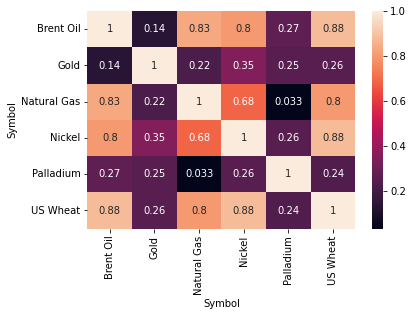

In [10]:
%matplotlib inline
sns.heatmap(close_corr_df, annot = True)
plt.show()

##**Create 'volume' dataframe for correlation between volume**

In [11]:
df_vol_pivot = df.pivot('Date','Symbol','Volume').reset_index()

df_vol_pivot

Symbol       Date  Brent Oil    Gold  Natural Gas   Nickel  Palladium  \
0      2020-01-01        NaN     0.0          0.0      NaN        0.0   
1      2020-01-02   205689.0  1248.0     164570.0  75604.0        0.0   
2      2020-01-03   479696.0   409.0     144669.0  84314.0        0.0   
3      2020-01-05        NaN     NaN          NaN      NaN        0.0   
4      2020-01-06   341137.0     7.0     154678.0  83014.0        0.0   
..            ...        ...     ...          ...      ...        ...   
704    2022-04-04   218681.0   371.0     137180.0   3850.0        0.0   
705    2022-04-05   203055.0   412.0     158216.0   4235.0        0.0   
706    2022-04-06   286516.0   138.0     166720.0   5897.0        0.0   
707    2022-04-07   296034.0   311.0     199510.0   4832.0        0.0   
708    2022-04-08   217643.0     0.0          0.0      0.0        0.0   

Symbol  US Wheat  
0            0.0  
1        49931.0  
2        44180.0  
3            NaN  
4        47904.0  
..           ...  
704          0.0  
705          0.0  
706          0.0  
707          0.0  
708          0.0  

[709 rows x 7 columns]

In [12]:
vol_corr_df = df_vol_pivot.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
vol_corr_df.head().reset_index()
#del close_corr_df.index.name
vol_corr_df

Symbol       Brent Oil      Gold  Natural Gas    Nickel  Palladium  US Wheat
Symbol                                                                      
Brent Oil     1.000000  0.133793     0.307753  0.180555        NaN -0.028526
Gold          0.133793  1.000000    -0.094765 -0.123412        NaN -0.309039
Natural Gas   0.307753 -0.094765     1.000000  0.339391        NaN  0.174081
Nickel        0.180555 -0.123412     0.339391  1.000000        NaN  0.153319
Palladium          NaN       NaN          NaN       NaN        NaN       NaN
US Wheat     -0.028526 -0.309039     0.174081  0.153319        NaN  1.000000

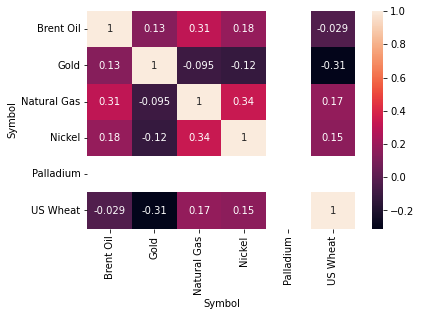

In [13]:
sns.heatmap(vol_corr_df, annot = True)
plt.show()

#**Build bar charts**

In [14]:
df_bar = df

df_bar

Symbol       Date    Close  Volume
5097       Gold 2020-01-01  1520.95       0
5098       Gold 2020-01-02  1572.10    1248
5099       Gold 2020-01-03  1596.40     409
5100       Gold 2020-01-06  1613.30       7
5101       Gold 2020-01-07  1618.70      72
...         ...        ...      ...     ...
29930  US Wheat 2022-04-04  1010.25       0
29931  US Wheat 2022-04-05  1045.25       0
29932  US Wheat 2022-04-06  1041.12       0
29933  US Wheat 2022-04-07  1020.00       0
29934  US Wheat 2022-04-08  1051.50       0

[3659 rows x 4 columns]

In [15]:
df_bar.set_index('Date')


Symbol    Close  Volume
Date                                 
2020-01-01      Gold  1520.95       0
2020-01-02      Gold  1572.10    1248
2020-01-03      Gold  1596.40     409
2020-01-06      Gold  1613.30       7
2020-01-07      Gold  1618.70      72
...              ...      ...     ...
2022-04-04  US Wheat  1010.25       0
2022-04-05  US Wheat  1045.25       0
2022-04-06  US Wheat  1041.12       0
2022-04-07  US Wheat  1020.00       0
2022-04-08  US Wheat  1051.50       0

[3659 rows x 3 columns]

In [16]:
df_bar_pivot = df_bar.pivot('Date', 'Symbol', 'Close')

In [17]:
df_bar_pivot

Symbol      Brent Oil     Gold  Natural Gas   Nickel  Palladium  US Wheat
Date                                                                     
2020-01-01        NaN  1520.95        2.179      NaN    1914.50    559.50
2020-01-02      66.25  1572.10        2.122  14260.0    1931.30    560.25
2020-01-03      68.60  1596.40        2.130  13755.0    1957.40    554.50
2020-01-05        NaN      NaN          NaN      NaN    1971.10       NaN
2020-01-06      68.91  1613.30        2.135  13820.0    1997.60    550.00
...               ...      ...          ...      ...        ...       ...
2022-04-04     107.53  1929.20        5.712  33245.0    2295.00   1010.25
2022-04-05     106.64  1922.90        6.032  33312.0    2230.02   1045.25
2022-04-06     101.07  1918.40        6.029  33467.0    2191.50   1041.12
2022-04-07     100.58  1933.80        6.359  33698.0    2250.00   1020.00
2022-04-08     102.78  1941.60        6.278  33855.0    2423.00   1051.50

[709 rows x 6 columns]

In [18]:
print(df_bar_pivot.loc['2020-02-24'])

Symbol
Brent Oil         56.300
Gold            1713.500
Natural Gas        1.827
Nickel         12430.000
Palladium       2529.700
US Wheat         536.250
Name: 2020-02-24 00:00:00, dtype: float64


In [19]:
two_years_prior = df_bar_pivot.loc['2020-02-24']
two_years_prior

Symbol
Brent Oil         56.300
Gold            1713.500
Natural Gas        1.827
Nickel         12430.000
Palladium       2529.700
US Wheat         536.250
Name: 2020-02-24 00:00:00, dtype: float64

<AxesSubplot:xlabel='Symbol'>

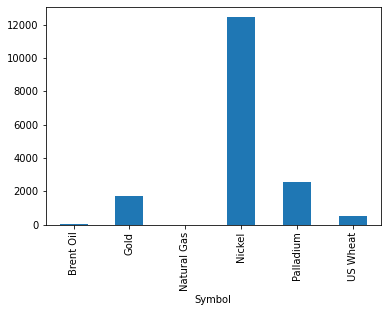

In [20]:
two_years_prior.plot.bar(y = 'Close')

In [21]:
one_year_prior = df_bar_pivot.loc['2021-02-24']
one_year_prior

Symbol
Brent Oil         67.040
Gold            1808.000
Natural Gas        2.854
Nickel         19709.000
Palladium       2441.000
US Wheat         680.250
Name: 2021-02-24 00:00:00, dtype: float64

In [22]:
final_bar_df = df_bar_pivot.loc[['2020-02-24','2021-02-24', '2021-08-24','2021-11-24', '2022-01-24', '2022-02-24','2022-03-24', '2022-04-08']]

final_bar_df

Symbol      Brent Oil    Gold  Natural Gas   Nickel  Palladium  US Wheat
Date                                                                    
2020-02-24      56.30  1713.5        1.827  12430.0    2529.70    536.25
2021-02-24      67.04  1808.0        2.854  19709.0    2441.00    680.25
2021-08-24      71.05  1812.5        3.896  19074.0    2456.50    718.00
2021-11-24      82.25  1788.8        5.068  20846.0    1856.50    836.75
2022-01-24      86.27  1844.2        4.027  22404.0    2137.00    800.50
2022-02-24      99.08  1926.3        4.568  24716.0    2421.02    926.00
2022-03-24     119.03  1962.2        5.401  37049.5    2534.00   1085.75
2022-04-08     102.78  1941.6        6.278  33855.0    2423.00   1051.50

<AxesSubplot:xlabel='Date'>

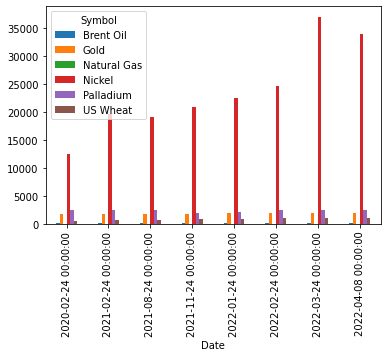

In [23]:
final_bar_df.plot.bar()

<AxesSubplot:xlabel='Symbol'>

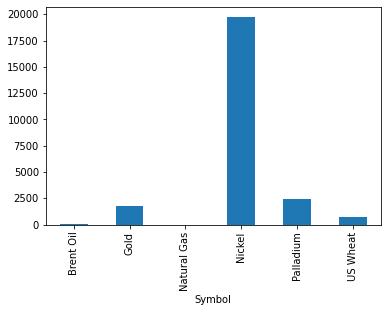

In [24]:
one_year_prior.plot.bar(y='Close')

#**Build line graph**

In [25]:
df_close_pivot

Symbol       Date  Brent Oil     Gold  Natural Gas   Nickel  Palladium  \
0      2020-01-01        NaN  1520.95        2.179      NaN    1914.50   
1      2020-01-02      66.25  1572.10        2.122  14260.0    1931.30   
2      2020-01-03      68.60  1596.40        2.130  13755.0    1957.40   
3      2020-01-05        NaN      NaN          NaN      NaN    1971.10   
4      2020-01-06      68.91  1613.30        2.135  13820.0    1997.60   
..            ...        ...      ...          ...      ...        ...   
704    2022-04-04     107.53  1929.20        5.712  33245.0    2295.00   
705    2022-04-05     106.64  1922.90        6.032  33312.0    2230.02   
706    2022-04-06     101.07  1918.40        6.029  33467.0    2191.50   
707    2022-04-07     100.58  1933.80        6.359  33698.0    2250.00   
708    2022-04-08     102.78  1941.60        6.278  33855.0    2423.00   

Symbol  US Wheat  
0         559.50  
1         560.25  
2         554.50  
3            NaN  
4         550.00  
..           ...  
704      1010.25  
705      1045.25  
706      1041.12  
707      1020.00  
708      1051.50  

[709 rows x 7 columns]

Close pivot didn't work as well as bar pivot, so that is what I'll be using for now.

<AxesSubplot:xlabel='Date'>

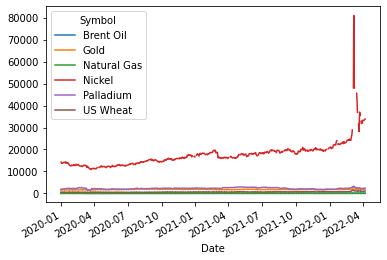

In [26]:
df_bar_pivot.plot.line()

In [27]:
new_corr = df_bar_pivot.corr(method='pearson')
new_corr

Symbol       Brent Oil      Gold  Natural Gas    Nickel  Palladium  US Wheat
Symbol                                                                      
Brent Oil     1.000000  0.136205     0.832375  0.796363   0.273004  0.880241
Gold          0.136205  1.000000     0.223735  0.351634   0.253660  0.259124
Natural Gas   0.832375  0.223735     1.000000  0.683735   0.033069  0.796235
Nickel        0.796363  0.351634     0.683735  1.000000   0.258318  0.880347
Palladium     0.273004  0.253660     0.033069  0.258318   1.000000  0.235459
US Wheat      0.880241  0.259124     0.796235  0.880347   0.235459  1.000000

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

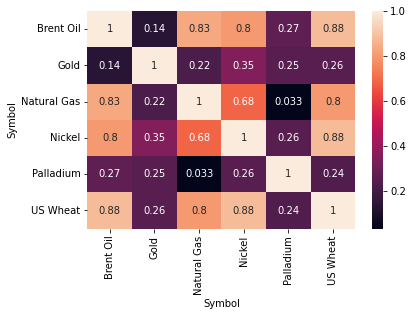

In [28]:
sns.heatmap(new_corr, annot=True)

#**Final Takeaways**

In [29]:
final_df = df_bar_pivot
final_df

Symbol      Brent Oil     Gold  Natural Gas   Nickel  Palladium  US Wheat
Date                                                                     
2020-01-01        NaN  1520.95        2.179      NaN    1914.50    559.50
2020-01-02      66.25  1572.10        2.122  14260.0    1931.30    560.25
2020-01-03      68.60  1596.40        2.130  13755.0    1957.40    554.50
2020-01-05        NaN      NaN          NaN      NaN    1971.10       NaN
2020-01-06      68.91  1613.30        2.135  13820.0    1997.60    550.00
...               ...      ...          ...      ...        ...       ...
2022-04-04     107.53  1929.20        5.712  33245.0    2295.00   1010.25
2022-04-05     106.64  1922.90        6.032  33312.0    2230.02   1045.25
2022-04-06     101.07  1918.40        6.029  33467.0    2191.50   1041.12
2022-04-07     100.58  1933.80        6.359  33698.0    2250.00   1020.00
2022-04-08     102.78  1941.60        6.278  33855.0    2423.00   1051.50

[709 rows x 6 columns]

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

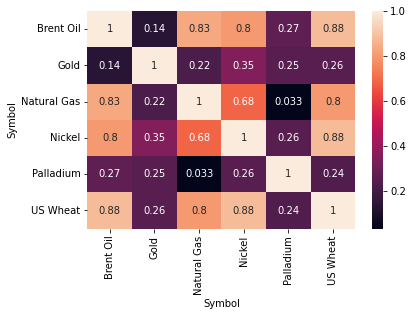

In [30]:
final_corr = new_corr

sns.heatmap(final_corr, annot = True)

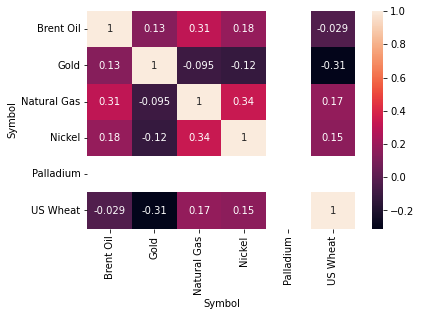

In [31]:
sns.heatmap(vol_corr_df, annot = True)
plt.show()

<AxesSubplot:xlabel='Date'>

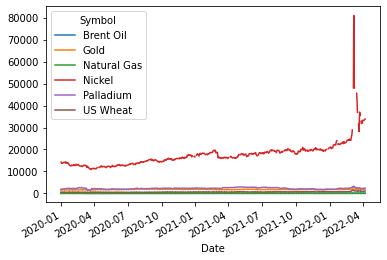

In [32]:
final_df.plot.line()

In [33]:
final_bar_df

Symbol      Brent Oil    Gold  Natural Gas   Nickel  Palladium  US Wheat
Date                                                                    
2020-02-24      56.30  1713.5        1.827  12430.0    2529.70    536.25
2021-02-24      67.04  1808.0        2.854  19709.0    2441.00    680.25
2021-08-24      71.05  1812.5        3.896  19074.0    2456.50    718.00
2021-11-24      82.25  1788.8        5.068  20846.0    1856.50    836.75
2022-01-24      86.27  1844.2        4.027  22404.0    2137.00    800.50
2022-02-24      99.08  1926.3        4.568  24716.0    2421.02    926.00
2022-03-24     119.03  1962.2        5.401  37049.5    2534.00   1085.75
2022-04-08     102.78  1941.6        6.278  33855.0    2423.00   1051.50

<AxesSubplot:xlabel='Date'>

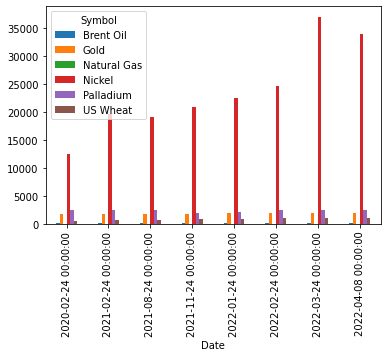

In [34]:
final_bar_df.plot.bar()

In [35]:
from pandas_profiling import ProfileReport

In [36]:
profile = ProfileReport(final_df, title = "Commodities Profiling Report", html ={'style':{"full_width":True}})

In [37]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Conclusion
Based on the data above, it is clear that the Russian invasion of Ukraine has had a significant effect on the price of Nickel. Brent oil and US wheat have strong correlations with the close price of Nickel; however, this correlation does not extend to the volume at which they are traded. The line graph shows that the Covid pandemic did not have nearly the same impact on the commodities analyzed here that the Russian offensive did. The bar graph also confirms the sharp rise in Nickel's price following the Russian invasion. An important consideration to recognize is that Russia is a major exporter of Palladium and Nickel. Therefore, it is reasonable to expect them to offer a strong correlation and to observe a comparably large spike in Palladium prices. This is particularly logical when considering the financial sanctions imposed on Russia in response to its offensive. However, the two commodities do not share strongly correlated close prices (0.26). The Pandas Profile Report also shows minimal interaction between the two commodities. Indeed, when comparing prices in the "final_bar_df" above, the differences are shocking. In the month after Russia's invasion, the price of Palladium rose 4.7% versus Nickel's growth of 49.9%. Clearly, Russian sanctions were not the sole driver of Nickel's rapid rise in price. It is worth noting that alternative visualizations to consider in the future include graphs without Nickel to better see the changes in US Wheat and Brent Oil during the war. 